In [ ]:
%conda install numpy
%conda install matplotlib

In [36]:
width = 17
height = 17
origin = (width / 2, height / 2)
radius = 6
eps = 4

In [37]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

plt.rcParams["figure.dpi"] = 92

def init_plot(fig, ax):
    fig.set_size_inches(3, 3)
    ax.set_xlim(0, eps * width)
    ax.set_ylim(0, eps * width)
    ax.tick_params(bottom = False, left = False)
    return fig, ax

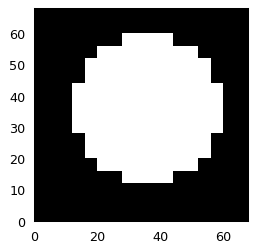

In [52]:
import numpy as np

pixels_no_aa = np.zeros([height, width])
for y in range(len(pixels_no_aa)):
    row = pixels_no_aa[y]
    for x in range(len(row)):
        if (x - origin[0]) ** 2 + (y - origin[1]) ** 2 <= radius ** 2:
            pixels_no_aa[y][x] = 1

fig, ax = plt.subplots()
init_plot(fig, ax)
for y in range(len(pixels_no_aa)):
    row = pixels_no_aa[y]
    for x in range(len(row)):
        pix = row[x]
        rect = patches.Rectangle((x * eps, y * eps), eps, eps, fc = str(pix), fill = True)
        ax.add_patch(rect)
plt.show()

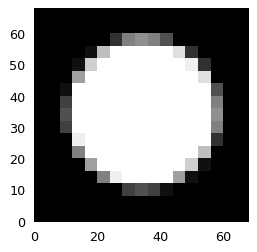

In [54]:
scale = 4

pixels_sp = np.zeros([height * scale, width * scale])
pixels_sp_aa = np.zeros([height, width])
for y in range(len(pixels_sp)):
    row = pixels_sp[y]
    for x in range(len(row)):
        xs, ys = x / scale, y / scale
        if (xs - origin[0]) ** 2 + (ys - origin[1]) ** 2 <= radius ** 2:
            pixels_sp[y][x] = 1

for y in range(len(pixels_sp_aa)):
    row = pixels_sp_aa[y]
    for x in range(len(row)):
        conv = 0
        xx, yy = x * scale, y * scale
        for dx in range(scale):
            for dy in range(scale):
                conv += pixels_sp[yy + dy][xx + dx]
        pixels_sp_aa[y][x] = conv / (scale * scale)

fig, ax = plt.subplots()
init_plot(fig, ax)
for y in range(len(pixels_sp_aa)):
    row = pixels_sp_aa[y]
    for x in range(len(row)):
        pix = row[x]
        rect = patches.Rectangle((x * eps, y * eps), eps, eps, fc = str(pix), fill = True)
        ax.add_patch(rect)
plt.show()

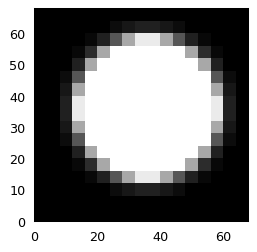

In [51]:
sensitive = 1 / 6
threshold = 0.02
shrink = 1 / sensitive

pixels_th_aa = np.zeros([height, width])
for y in range(len(pixels_th_aa)):
    row = pixels_th_aa[y]
    for x in range(len(row)):
        dist2 = (x - origin[0]) ** 2 + (y - origin[1]) ** 2 - radius ** 2 + shrink
        if dist2 < 0:
            dist2 = 0
        pix = np.exp(-sensitive * dist2)
        if pix < threshold:
            pix = 0
        pixels_th_aa[y][x] = pix

fig, ax = plt.subplots()
init_plot(fig, ax)
for y in range(len(pixels_th_aa)):
    row = pixels_th_aa[y]
    for x in range(len(row)):
        pix = row[x]
        rect = patches.Rectangle((x * eps, y * eps), eps, eps, fc = str(pix), fill = True)
        ax.add_patch(rect)
plt.show()